<a href="https://colab.research.google.com/github/ArmanMarzban/MachineLearning2024/blob/main/Machine_Leraning_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 18ETECLmR2FqvJEFmVXJO4Kz9H8efFpRC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Game.csv')
df = df.dropna()
df

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['p_hours']].values
y = df[['w_l']].values
X, y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [20]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [21]:
def logistic_regression(x, w):
  y_hat = sigmoid(x@w)
  return y_hat

In [ ]:
y_hat = logistic_regression(np.random.randn(5, 2), np.random.randn(2, 1))
y_hat

$L=-[ylog(\hat{y})+(1-y)log(1-\hat{y})]$

In [28]:
# Binary Cross Entropy Loss Function
def bce(y, y_hat):
  loss= -(np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))
  return loss



In [ ]:
  bce(np.ones((5, 1)), y_hat)


$\nabla L_w(w)=\frac{1}{n}X^T(\hat{y}-y)$

In [31]:
def gradient(x, y, y_hat):
  grads = (x.T @ (y_hat - y))/len(y)
  return grads


In [ ]:
gradient(np.random.randn(5, 2), np.ones((5, 1)), y_hat)

Gradien Descent

In [34]:
def gradien_descent(w, eta, grads):
  w-= eta*grads
  return w


Accuracy

In [35]:
def accuracy(y, y_hat):
  acc= np.sum(y==np.round(y_hat)) / len(y)
  return acc

In [37]:
accuracy(np.array([1, 0, 1]), np.array([0.7, 0.4, 0.3]))

0.6666666666666666

Train

In [ ]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

In [40]:
m=1
w = np.random.randn(m+1, 1)
print(w.shape)
eta = 0.01
n_epochs =500 #N itrations

(2, 1)


In [ ]:
error_hist=[]
for epoch in range(n_epochs):
  #predictions
  y_hat = logistic_regression(x_train, w)

  #loss
  e = bce(y_train, y_hat)
  error_hist.append(e)

  #gradients
  grads = gradient(x_train, y_train, y_hat)
  # gradient descent
  w=gradien_descent(w, eta, grads)

  if (epoch+1) %10 ==0:
    print(f'Epoch={epoch},\t E={e:0.4}, \t w={w.T[0]}')



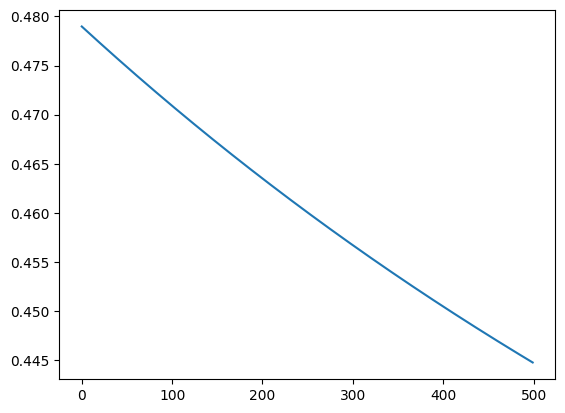

In [49]:
plt.plot(error_hist)